# Importing Libraries
### Pratik Parmar
### 2016UCS0049

In [1]:
import cv2
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Loading image as using cv2**

In [2]:
image=cv2.imread("./noisyimg.jpg",0)

**Low Pass Filter Definition (Average Filter)**

In [3]:
def low_pass_filter(X_matrix,size):
	X=np.zeros((len(X_matrix),len(X_matrix[0])))
	for j in range(0,len(X_matrix)-size+1,1):
		for k in range(0,len(X_matrix[0])-size+1,1):
			temp=0;
			for m in range(0,size,1):
				for n in range(0,size,1):
					temp+=X_matrix[j+m][k+n];
			X[j][k]=temp//(size*size);
	return X;

**Applying Low-pass Average filter over image.**

In [4]:
image=np.array(image)
i=low_pass_filter(image,3)
i1=low_pass_filter(image,5)
i2=low_pass_filter(image,7)

**Plotting Images**

Text(0.5,1,u'Image after 7X7 Filter')

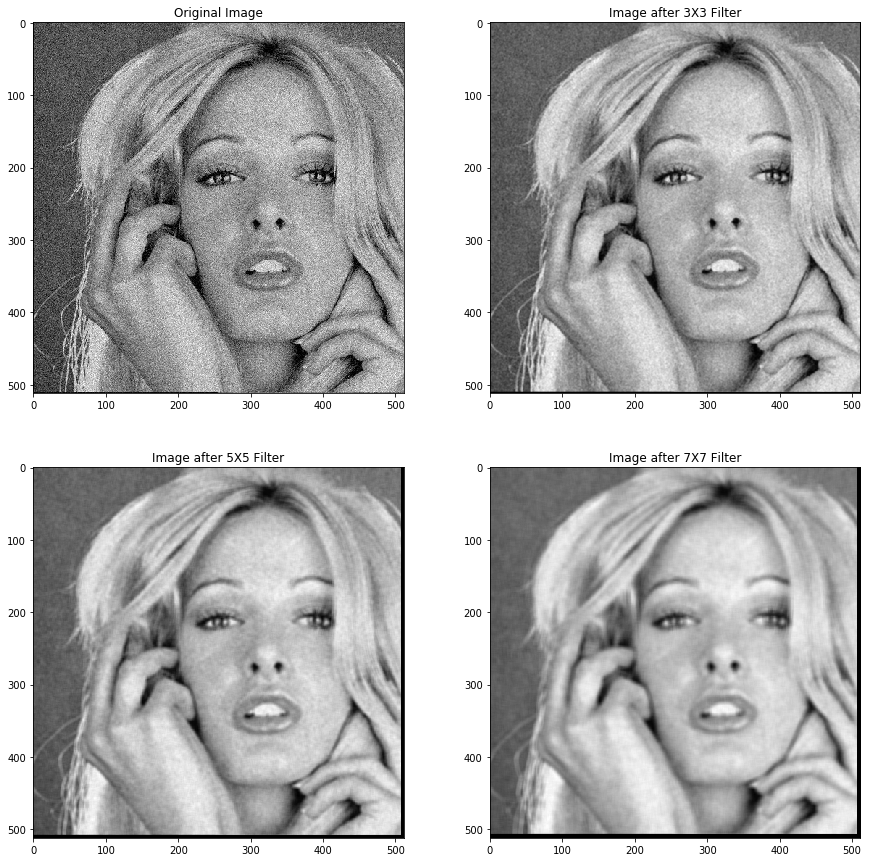

In [5]:
f, axarr = plt.subplots(2,2,figsize=(15,15))
axarr[0,0].imshow(image,cmap="gray")
axarr[0,0].set_title("Original Image")
axarr[0,1].imshow(i,cmap="gray")
axarr[0,1].set_title("Image after 3X3 Filter")
axarr[1,0].imshow(i1,cmap="gray")
axarr[1,0].set_title("Image after 5X5 Filter")
axarr[1,1].imshow(i2,cmap="gray")
axarr[1,1].set_title("Image after 7X7 Filter")

**Function Definition for Gaussian Filter**

In [6]:
def gaussian_filter(X_matrix,size,sigma):
	filter=np.zeros((size,size))
	center=size//2
	for i in range(0,size):
		for j in range(0,size):
			filter[i,j]=(1/math.sqrt(2*math.pi*sigma*sigma))*math.exp(-(((center-i)**2)+((center-j)**2))/(2*sigma*sigma));
	X=np.zeros((len(X_matrix),len(X_matrix[0])))
	for j in range(0,len(X_matrix)-size+1,1):
		for k in range(0,len(X_matrix[0])-size+1,1):
			temp=0;
			for m in range(0,size,1):
				for n in range(0,size,1):
					temp+=X_matrix[j+m][k+n]*filter[m,n];
			X[j][k]=temp//(size*size);
	return X;


**Applying Gaussian Function on image**

In [7]:
g=gaussian_filter(image,3,1.2)
g1=gaussian_filter(image,5,1.2)
g2=gaussian_filter(image,7,1.2)

**Plotting images after gaussian filter**

Text(0.5,1,u'Image after 7X7 Filter')

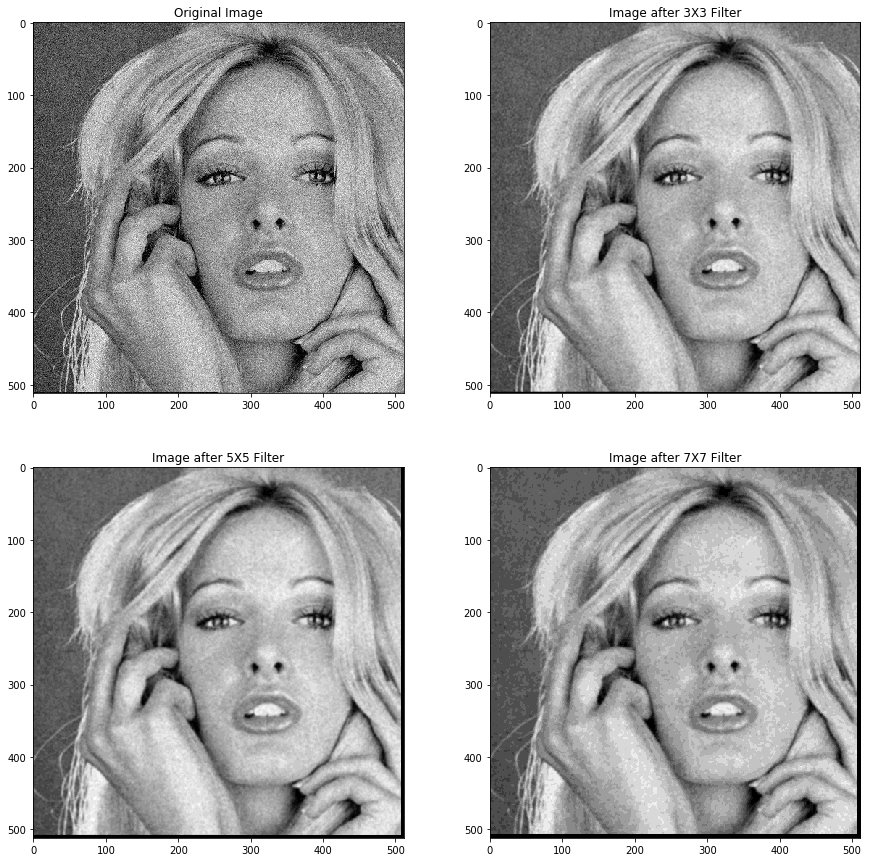

In [8]:
f1, axarr1 = plt.subplots(2,2,figsize=(15,15))
axarr1[0,0].imshow(image,cmap="gray")
axarr1[0,0].set_title("Original Image")
axarr1[0,1].imshow(g,cmap="gray")
axarr1[0,1].set_title("Image after 3X3 Filter")
axarr1[1,0].imshow(g1,cmap="gray")
axarr1[1,0].set_title("Image after 5X5 Filter")
axarr1[1,1].imshow(g2,cmap="gray")
axarr1[1,1].set_title("Image after 7X7 Filter")

**Bilateral Filter**

In [9]:
def bilateral_filter(X_matrix,size,sigma_d,sigma_r):
	X=np.zeros((len(X_matrix),len(X_matrix[0])))
	center=size//2    
	for j in range(center,len(X_matrix)-center,1):
		for k in range(center,len(X_matrix[0])-center,1):
			temp=0;
			w_sum=0;
			for m in range(-center,center+1,1):
				for n in range(-center,center+1,1):
					w=math.exp(-(((m)**2+(n)**2)/(2*sigma_d*sigma_d))-((abs(X_matrix[j+m][k+n]-X_matrix[j][k]))/(2*sigma_r*sigma_r)))
					temp+=X_matrix[j+m][k+n]*w;
					w_sum+=w;
			X[j][k]=temp//(w_sum);
	return X;

**Applying Bilateral Filter over image**

In [10]:
b=bilateral_filter(image,3,2,0.25)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


In [11]:
b1=bilateral_filter(image,5,2,0.25)
b2=bilateral_filter(image,7,2,0.25)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.


**Plotting images after applying Bilateral Filter**

In [12]:
f2, axarr2 = plt.subplots(2,2,figsize=(15,15))
axarr2[0,0].imshow(image,cmap="gray")
axarr2[0,0].set_title("Original Image")
axarr2[0,1].imshow(b,cmap="gray")
axarr2[0,1].set_title("Image after 3X3 Filter")
axarr2[1,0].imshow(b1,cmap="gray")
axarr2[1,0].set_title("Image after 5X5 Filter")
axarr2[1,1].imshow(b2,cmap="gray")
axarr2[1,1].set_title("Image after 7X7 Filter")

Text(0.5,1,u'Image after 7X7 Filter')

**Showing Images after applying different filters.**

Text(0.5,1,u'Image after Bilateral Filter')

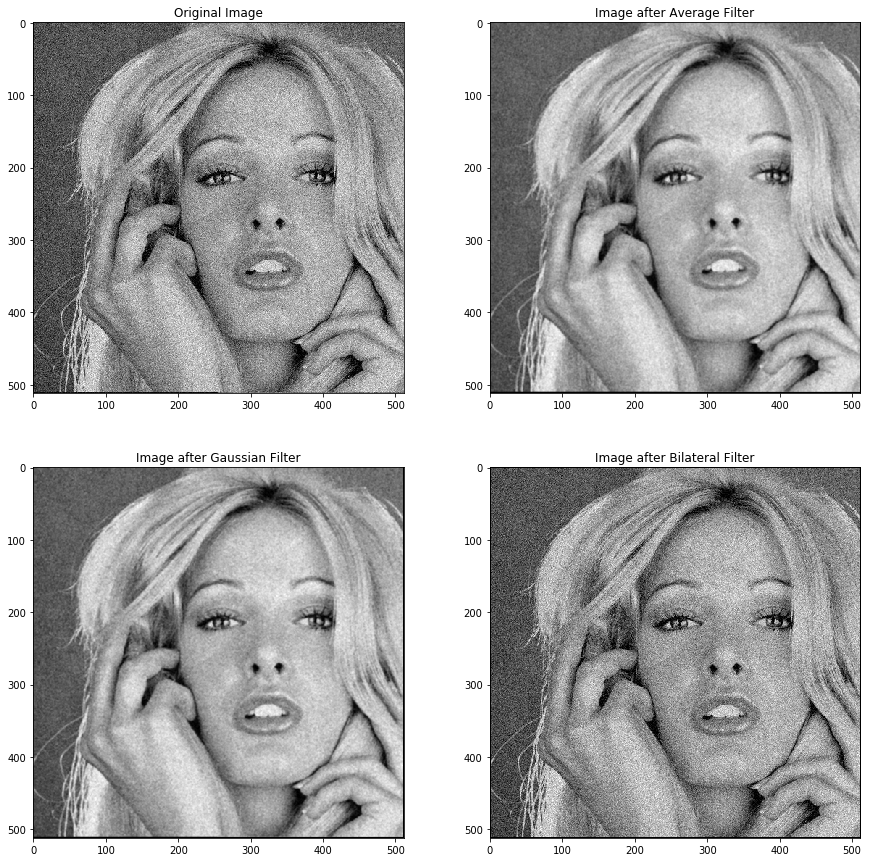

In [13]:
f23, axarr3 = plt.subplots(2,2,figsize=(15,15))
axarr3[0,0].imshow(image,cmap="gray")
axarr3[0,0].set_title("Original Image")
axarr3[0,1].imshow(i,cmap="gray")
axarr3[0,1].set_title("Image after Average Filter")
axarr3[1,0].imshow(g,cmap="gray")
axarr3[1,0].set_title("Image after Gaussian Filter")
axarr3[1,1].imshow(b,cmap="gray")
axarr3[1,1].set_title("Image after Bilateral Filter")

*As visible from the pictures, Bilateral filter is able to conserve edges, while edges have become blurry in average and gaussian filtered images.*

**Non Local Means Filter Definition**

In [14]:
def non_local_means(X,w,s,sigma):
    img=np.zeros((len(X),len(X[0])))
    start= w//2
    st= s//2
    for i in range(start+1,len(X)-start-1,1):
        for j in range(start+1,len(X)-start-1,1):
            for m in range(-st,st+1,1):
                for n in range(-st,st+1,1):
                    current_window=X[i-start:i-start+w:1,j-start:j-start+w:1];
                    other_window=X[i-start+m:i-start+m+w:1,j-start+n:w+j+n-start:1];
                    dif=np.subtract(current_window,other_window);
                    dif=np.sqrt(np.square(dif));
                    su=np.sum(dif)//w*w
                    f=(math.exp(-(su/sigma**2)));
                    img[i][j]=f*X[i][j];
    return img;
                    

**Applying Non-Local Means Filter over image**

In [15]:
n=non_local_means(image,7,3,121);

**Plotting Original Image and Non-Local mean filtered image**

Text(0.5,1,u'Image after NLM Filter')

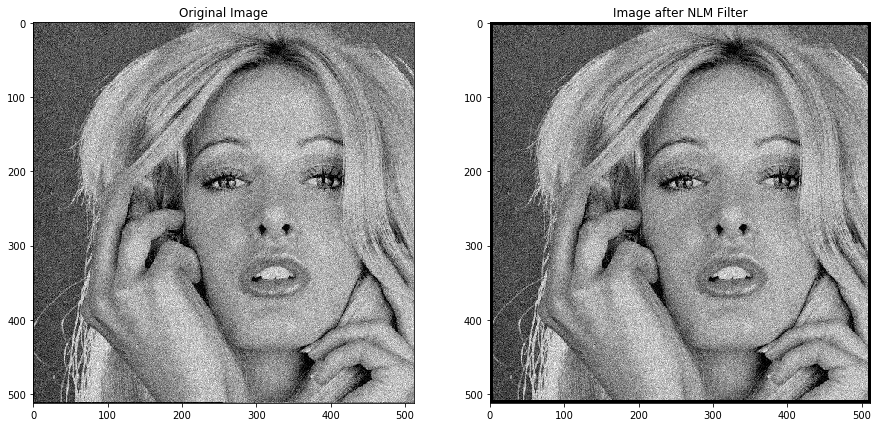

In [16]:
f4, axarr4 = plt.subplots(1,2,figsize=(15,15))
axarr4[0].imshow(image,cmap="gray")
axarr4[0].set_title("Original Image")
axarr4[1].imshow(n,cmap="gray")
axarr4[1].set_title("Image after NLM Filter")

*Image obtained after applying non-local means filter is quite similar to original image*

# Observations
**Following things have been observed:**
1. As the size of filter increases image becomes more distorted/blur.
2. Simply averging pixel could harm sharpness of edges in images and they will become difficult to observe.
3. In terms of quality of images after applying filters, given order has been observed for Noiseless image.
    Non-Local Means > Bilateral Filter > Average Filter > Gaussian Filter.

**Writing Image for IQA**

In [19]:
cv2.imwrite("Average3X3Woman.jpg",i)
cv2.imwrite("Gaussian3X3Woman.jpg",g)
cv2.imwrite("Bilateral3X3Woman.jpg",b)
cv2.imwrite("NonLocalMean3X3Woman.jpg",n)

True

**If we use a good image without noise such as "jetplane.tif",following result has been observed.**<br> 
**Average Filter: 39.839788083142906** <br>
**Gaussian Filter: 61.209979973294224 ** <br>
**Bilateral Filter: 22.582859348329492 ** <br>
**Non-Local Mean Filter: 20.138114937072686** <br>
**Original: 17.95464328720297**
#### Order of Performance Original > Non-Local Mean > Bilateral > Average > Gaussian 

**If we use a good image noisy such as "noisyimg.jpg",following result has been observed.**<br><br>
**Average Filter: 16.568779246551088** <br>
**Gaussian Filter: 39.92024529535067 ** <br>
**Bilateral Filter: 62.78938694837572 ** <br>
**Non-Local Mean Filter: 58.84832813312104** <br>
**Original: 61.307517675282924**

#### Order of Performance Average > Gaussian > Non-Local Means > Original > Bilateral  

For image quality assessment BRISQUE Model has been used, which is available at https://github.com/krshrimali/No-Reference-Image-Quality-Assessment-using-BRISQUE-Model